# **Covid-19 Sentiment Analysis - Part II**
This part contains the word tokenizaiton and cleaning process

In [1]:
import pandas as pd
import thulac
import seaborn as sns
import matplotlib.pyplot as plt

myfile = './train_df.csv'
with open(myfile,'r', errors = 'ignore') as f:
    raw_data = pd.read_csv(f,)
    
# raw_data = raw_data.rename(columns={"微博id": "ID", "微博发布时间": "time", '发布人账号':'user','微博中文内容':'content',
#                         '微博图片':'pic', '微博视频':'video','情感倾向':'sentiment'})

In [2]:
df = raw_data.copy()

## 1. Word Tokenization

In [3]:
# tokenize by http://thulac.thunlp.org/

thul = thulac.thulac(seg_only=True)  # by default

df['content'] = df['content'].astype(str).apply(lambda x : thul.cut(x,text = True))
#text = thu1.cut(df0.content[0], text=True)  #进行一句话分词
#print(text)
df.head(10)

Model loaded succeed


,Unnamed: 0,user_id,time,content,photo,video,sentiment
0,0,4456072029125500,2020-01-01 23:50:00,写 在 年末 冬初 孩子 流感 的 第五 天 ， 我们 仍然 没有 忘记 热情 拥抱 这 2...,1,0,0
1,1,4456074167480980,2020-01-01 23:58:00,开 年 大模型 … 累 到 以为 自己 发烧 了 腰 疼 膝盖 疼 腿 疼 胳膊 疼 脖子 ...,0,0,-1
2,2,4456054253264520,2020-01-01 22:39:00, 邱晨 这 就 是 我 爹 ， 爹 ， 发烧 快 好 ， 毕竟 美好 的 假期 拿 来 养...,1,0,1
3,3,4456061509126470,2020-01-01 23:08:00,新年 的 第一 天 感冒 又 发烧 的 也 太 衰 了 但是 我 要 想 着 明天 一定 会...,1,0,1
4,4,4455979322528190,2020-01-01 17:42:00,问 ： 我们 意念 里 有 坏 的 想法 了 ， 天神 就 会 给 记 下 来 ， 那 如果...,0,0,1
5,5,4455960703574270,2020-01-01 16:28:00,发高烧 反反复复 ， 眼睛 都 快 睁 不 开 了 。 今天 室友 带 我 去 看 ， 还 ...,1,0,-1
6,6,4456044141311370,2020-01-01 21:59:00,明天 考试 今天 发烧 跨年 给 我 跨 坏 了 ？ ？ 2 兰州 · 兰州 交通 大学 ?,0,0,-1
7,7,4456072930597380,2020-01-01 23:53:00,# 元旦 快乐 # # 枇杷 手法 小结 # 每个 娃 都 是 有 故事 的 娃 。 每个 ...,1,0,0
8,8,4456059546766320,2020-01-01 23:00:00,我 真 的 服 了 xkh 昨天 vv 去 和 她 说 自己 不 舒服 ， 描述 了 症状 ...,0,0,-1
9,9,4456064361730200,2020-01-01 23:19:00,新年 第一 天 ， 为 自己 鼓掌 ? ? ? ? ? ? 发烧 了 也 要 来 看 线 下...,1,0,1


## 2.Remove symbols and non-Chinese

In [4]:
df.content[0]

'写 在 年末 冬初 孩子 流感 的 第五 天 ， 我们 仍然 没有 忘记 热情 拥抱 这 2020 年 的 第一 天 。 带 着 一 丝 迷信 ， 早晨 给 孩子 穿 上 红色 的 羽绒服 羽绒裤 ， 祈祷 新 的 一 年 ， 孩子 们 身体 康健 。 仍然 会 有 一 丝 焦虑 ， 焦虑 我 的 孩子 为什 么 会 过早 的 懂事 ， 从 两 岁 多 开始 关注 我 的 情绪 ， 会 深沉 地 说 ： 妈妈 ， 你 终于 笑 了 ！ 这 句 话 像 刀子 一样 扎 入 我 ? 展开 全文 c'

In [5]:
import regex as re
# remove symbol, number and letter
symbols = "[a-zA-Z0-9\s+\.\!\/_,$%^*()??;；：【】+\"\'\[\]\\]+|[+——！，;:。？《》、~@#￥%……&*（）“”.=-]+"
df['content'] = df['content'].astype(str).apply(lambda x : re.sub(symbols, ' ', x))

#pre-cleaning, deleting or filtering unnecessary words like 'show more'
df['content'] = df['content'].astype(str).apply(lambda x : x.replace("展开全文", ""))

In [6]:
df.head()

,Unnamed: 0,user_id,time,content,photo,video,sentiment
0,0,4456072029125500,2020-01-01 23:50:00,写 在 年末 冬初 孩子 流感 的 第五 天 我们 仍然 没有 忘记 热情 拥抱 这 年 的...,1,0,0
1,1,4456074167480980,2020-01-01 23:58:00,开 年 大模型 累 到 以为 自己 发烧 了 腰 疼 膝盖 疼 腿 疼 胳膊 疼 脖子 疼 的,0,0,-1
2,2,4456054253264520,2020-01-01 22:39:00, 邱晨 这 就 是 我 爹 爹 发烧 快 好 毕竟 美好 的 假期 拿 来 养 病 不 太...,1,0,1
3,3,4456061509126470,2020-01-01 23:08:00,新年 的 第一 天 感冒 又 发烧 的 也 太 衰 了 但是 我 要 想 着 明天 一定 会...,1,0,1
4,4,4455979322528190,2020-01-01 17:42:00,问 我们 意念 里 有 坏 的 想法 了 天神 就 会 给 记 下 来 那 如果 有 好 的...,0,0,1


In [7]:
df.content[0]

'写 在 年末 冬初 孩子 流感 的 第五 天 我们 仍然 没有 忘记 热情 拥抱 这 年 的 第一 天 带 着 一 丝 迷信 早晨 给 孩子 穿 上 红色 的 羽绒服 羽绒裤 祈祷 新 的 一 年 孩子 们 身体 康健 仍然 会 有 一 丝 焦虑 焦虑 我 的 孩子 为什 么 会 过早 的 懂事 从 两 岁 多 开始 关注 我 的 情绪 会 深沉 地 说 妈妈 你 终于 笑 了 这 句 话 像 刀子 一样 扎 入 我 展开 全文 '

## 3. Constraint content length 
According to density plot, we only keep contents <= 150 words

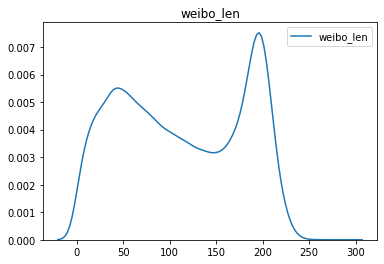

In [8]:
df['weibo_len'] = df['content'].astype(str).apply(len)
sns.kdeplot(df['weibo_len'])
plt.title('weibo_len')
plt.show()

In [9]:
df.shape

(99907, 8)

In [10]:
df = df[df.weibo_len<=150]
df.shape

(63848, 8)

## 4. Remove meaningfulless words
Import word list and filter word lists during the count vectorizer part
e.g. stopwords, adverbs...

In [11]:
import csv
myfile = './mystopwords.csv'

stopwords = pd.read_csv(myfile, delimiter='\n', header=None, encoding='utf-8', quoting=csv.QUOTE_NONE)
stopwords.shape

(1893, 1)

In [12]:
# from sklearn.feature_extraction import CountVectorizer

# count_vect = CountVectorizer(analyzer='word', stop_word = stopwords)
# count_vect.fit(df['content'])
# xtrain_count =  count_vect.transform(train_df['text_cut'])